<font size="4"> <b> • DOMAIN: </b>Autonomous Vehicles</font>

<font size="4"> <b> • CONTEXT: </b>A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. 

This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

<font size="4"> <b> • DATA DESCRIPTION: </b>The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

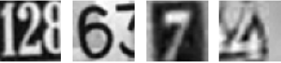

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.
    

<font size="4"> <b> • PROJECT OBJECTIVE: </b> We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

<b>Steps and tasks:</b>
    
1. Import data. 
2. Data pre-processing and visualisation.
3. Design, train, tune and test a neural network regressor.
*  Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same. </font>


<font size="5"><p style="color:black"> <b> 1. Import data:</p></font>

In [47]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [48]:
import warnings
warnings.filterwarnings('ignore')
import h5py
# Open the file as readonly
data = h5py.File('/gdrive/MyDrive/Colab Notebooks/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

<font size="5"><p style="color:black"> <b> 2. Data pre-processing and visualisation:</p></font>

In [49]:
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

In [50]:
X_train[1]

array([[86.9591, 87.0685, 88.3735, ..., 91.8014, 89.7477, 92.5302],
       [86.688 , 86.9114, 87.4337, ..., 90.7306, 87.204 , 88.5629],
       [85.9654, 85.8145, 85.9239, ..., 63.8626, 59.8199, 54.8805],
       ...,
       [90.2236, 91.0448, 93.4637, ..., 55.3535, 48.5822, 44.0557],
       [90.6427, 90.4039, 90.937 , ..., 78.2696, 77.4977, 74.27  ],
       [88.0236, 88.1977, 86.6709, ..., 75.2206, 76.6396, 79.2865]],
      dtype=float32)

In [51]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [52]:
X_test[1]

array([[115.1609, 114.161 , 113.1611, ..., 112.0302, 112.6711, 112.7851],
       [110.5743, 110.2754, 108.9766, ..., 106.1448, 106.7857, 107.0137],
       [102.8031, 102.5042, 101.7924, ...,  95.776 ,  95.531 ,  95.645 ],
       ...,
       [169.8457, 170.6176, 167.8028, ...,  45.1708,  55.6967,  62.81  ],
       [157.7329, 157.6189, 153.8042, ...,  42.9538,  50.1811,  56.1805],
       [150.3207, 149.2068, 144.8051, ...,  42.1388,  48.2522,  53.2517]],
      dtype=float32)

In [53]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

Label: 2


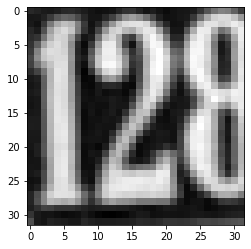

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[0]))
plt.imshow(X_train[0], cmap='gray')

Label: 1


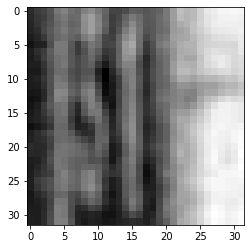

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_test[0]))
plt.imshow(X_test[0], cmap='gray')

In [56]:
X_test.shape

(18000, 32, 32)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


Reshaping the dataset from 3D tensor to 2D

In [58]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


Normalizing the dataset by dividing by the 255 as grayscale images take values upto 255

In [59]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


One hot encoding to convert class vector to binary class matrix

In [60]:
print(y_train[10])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


First 10 images and their labels

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


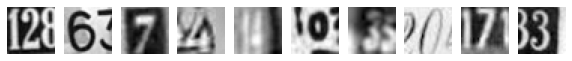

In [61]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


<font size="5"><p style="color:black"> <b>3. Designing, training, tuning and testing a neural network image classifier:</p></font>

Creating a neural network image classifier model 

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=((1024,)), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

Creating the neural network classifier model same as above but we have a consolidated accuracy instead of after every time frame or epoch

In [63]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

Checking for loss when Lambda (regularization ) = 0 

In [64]:
lr = 0.00001
Lambda = 0
train_and_test_loop(15, lr, Lambda)

Epoch 1/15
42/42 [==============================] - 2s 38ms/step - loss: 2.3869 - accuracy: 0.0951
Epoch 2/15
42/42 [==============================] - 2s 38ms/step - loss: 2.3786 - accuracy: 0.0949
Epoch 3/15
42/42 [==============================] - 2s 38ms/step - loss: 2.3711 - accuracy: 0.0942
Epoch 4/15
42/42 [==============================] - 2s 36ms/step - loss: 2.3644 - accuracy: 0.0941
Epoch 5/15
42/42 [==============================] - 2s 37ms/step - loss: 2.3585 - accuracy: 0.0938
Epoch 6/15
42/42 [==============================] - 2s 37ms/step - loss: 2.3533 - accuracy: 0.0944
Epoch 7/15
42/42 [==============================] - 2s 37ms/step - loss: 2.3487 - accuracy: 0.0946
Epoch 8/15
42/42 [==============================] - 2s 36ms/step - loss: 2.3446 - accuracy: 0.0945
Epoch 9/15
42/42 [==============================] - 2s 37ms/step - loss: 2.3410 - accuracy: 0.0943
Epoch 10/15
42/42 [==============================] - 2s 36ms/step - loss: 2.3378 - accuracy: 0.0946
Epoch 11/

Checking for loss when Lambda (regularization) = 1e^3

In [65]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(15, lr, Lambda)

Epoch 1/15
42/42 [==============================] - 2s 36ms/step - loss: 3354.6477 - accuracy: 0.0949
Epoch 2/15
42/42 [==============================] - 2s 36ms/step - loss: 40.9002 - accuracy: 0.0965
Epoch 3/15
42/42 [==============================] - 2s 36ms/step - loss: 2.6203 - accuracy: 0.0934
Epoch 4/15
42/42 [==============================] - 2s 37ms/step - loss: 2.3053 - accuracy: 0.1013
Epoch 5/15
42/42 [==============================] - 2s 36ms/step - loss: 2.3026 - accuracy: 0.1001
Epoch 6/15
42/42 [==============================] - 2s 37ms/step - loss: 2.3026 - accuracy: 0.1009
Epoch 7/15
42/42 [==============================] - 2s 36ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 8/15
42/42 [==============================] - 2s 44ms/step - loss: 2.3026 - accuracy: 0.1031
Epoch 9/15
42/42 [==============================] - 3s 67ms/step - loss: 2.3026 - accuracy: 0.1009
Epoch 10/15
42/42 [==============================] - 2s 38ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch

Checking for loss when Lambda (regularization) = 1e^7

In [66]:
lr = 0.00001
Lambda = 1e-7
train_and_test_loop(15, lr, Lambda)

Epoch 1/15
42/42 [==============================] - 2s 39ms/step - loss: 2.3832 - accuracy: 0.1013
Epoch 2/15
42/42 [==============================] - 2s 39ms/step - loss: 2.3740 - accuracy: 0.1006
Epoch 3/15
42/42 [==============================] - 2s 40ms/step - loss: 2.3658 - accuracy: 0.0999
Epoch 4/15
42/42 [==============================] - 2s 40ms/step - loss: 2.3589 - accuracy: 0.0993
Epoch 5/15
42/42 [==============================] - 2s 39ms/step - loss: 2.3531 - accuracy: 0.0990
Epoch 6/15
42/42 [==============================] - 2s 39ms/step - loss: 2.3480 - accuracy: 0.0983
Epoch 7/15
42/42 [==============================] - 2s 39ms/step - loss: 2.3437 - accuracy: 0.0975
Epoch 8/15
42/42 [==============================] - 2s 39ms/step - loss: 2.3399 - accuracy: 0.0976
Epoch 9/15
42/42 [==============================] - 2s 40ms/step - loss: 2.3366 - accuracy: 0.0971
Epoch 10/15
42/42 [==============================] - 2s 38ms/step - loss: 2.3337 - accuracy: 0.0968
Epoch 11/

Finding the best accuracy and loss using for loop in 10 iterations 

In [67]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 2s 36ms/step - loss: 2.2878 - accuracy: 0.1465
Epoch 2/100
42/42 [==============================] - 2s 37ms/step - loss: 2.0869 - accuracy: 0.3200
Epoch 3/100
42/42 [==============================] - 2s 36ms/step - loss: 1.7488 - accuracy: 0.4203
Epoch 4/100
42/42 [==============================] - 2s 37ms/step - loss: 1.4190 - accuracy: 0.5404
Epoch 5/100
42/42 [==============================] - 2s 37ms/step - loss: 1.2621 - accuracy: 0.5986
Epoch 6/100
42/42 [==============================] - 2s 37ms/step - loss: 1.1783 - accuracy: 0.6281
Epoch 7/100
42/42 [==============================] - 2s 36ms/step - loss: 1.1342 - accuracy: 0.6398
Epoch 8/100
42/42 [==============================] - 2s 36ms/step - loss: 1.0935 - accuracy: 0.6533
Epoch 9/100
42/42 [==============================] - 2s 36ms/step - loss: 0.9804 - accuracy: 0.6952
Epoch 10/100
42/42 [==============================] - 2s 36ms/step - loss: 0.9822 - accuracy: 0.6938

Hyperparameter tuning the dataset with the best params

In [70]:
# hyperparameters
iterations = 50
learning_rate = 0.05296225450286876
hidden_nodes = 256
output_nodes = 10
Lambda: 0.00011445347794978558

final_model = Sequential()
final_model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
final_model.add(Dense(hidden_nodes, activation='relu'))
final_model.add(Dense(hidden_nodes, activation='relu'))
final_model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
final_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
# Fit the model
history = final_model.fit(X_train, y_train,
          batch_size      = 100,
          epochs          = iterations,
          validation_data = (X_test, y_test),
          shuffle         = True,
          verbose=0) 

Summary of the model 

In [71]:
final_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               262400    
                                                                 
 dense_49 (Dense)            (None, 256)               65792     
                                                                 
 dense_50 (Dense)            (None, 256)               65792     
                                                                 
 dense_51 (Dense)            (None, 10)                2570      
                                                                 
Total params: 396,554
Trainable params: 396,554
Non-trainable params: 0
_________________________________________________________________


Accuracy of the model

In [72]:
final_model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.9757 - accuracy: 0.7217


[0.9756832718849182, 0.7217222452163696]

<font size="5"><p style="color:black"> <b>4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same:</p></font>

Plotting a figure for:

i) training loss, validation loss vs number of epochs

ii) training accuracy, validation accuracy vs number of epochs

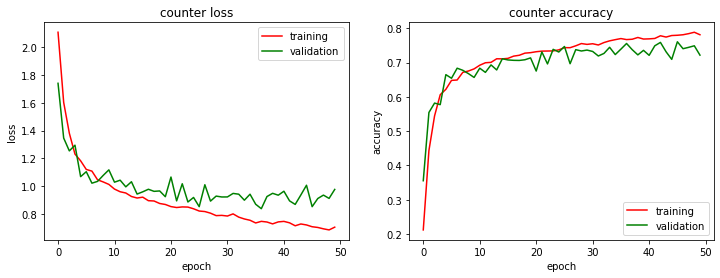

In [99]:
# plot loss
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
ctl_plot = plt.plot(history.history['loss'], 'r', label='training')
cvl_plot = plt.plot(history.history['val_loss'], 'g', label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('counter loss')
plt.legend()

# plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r', label='training')
plt.plot(history.history['val_accuracy'], 'g', label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('counter accuracy')
plt.legend(loc=4)

Accuracy and Loss for the model 

In [76]:
scores=[]

score = final_model.evaluate(X_train, y_train, verbose=0)
scores.append(score)
score = final_model.evaluate(X_test,y_test, verbose=0)
scores.append(score)

print('Training dataset:- Loss is ', scores[0][0], 'accuracy is ', str(round(scores[0][1], 2)))
print('Testing dataset:- Loss is ', scores[1][0], 'accuracy is ',str(round(scores[1][1], 2)))

Training dataset:- Loss is  0.7655381560325623 accuracy is  0.76
Testing dataset:- Loss is  0.9756832718849182 accuracy is  0.72


Defining y_test with max values using argmax numpy function

In [77]:
y_test = np.argmax(y_test, axis=1)

Predicting the label for images using the 'final_model' 

In [84]:
from tensorflow.keras.models import Sequential

y_predict = np.argmax(final_model.predict(X_test), axis=-1)

for i in range(len(X_test[0:5])):
    print("X=%s, Predicted=%s\n" % (X_test[i], y_test[i]))
   

X=[0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627], Predicted=1

X=[0.45161137 0.44769022 0.44376904 ... 0.1652502  0.18922432 0.20883021], Predicted=7

X=[0.52256864 0.52834475 0.53456783 ... 0.50266707 0.5012169  0.5027937 ], Predicted=2

X=[0.31330708 0.37649295 0.40366313 ... 0.3405196  0.41574708 0.48196   ], Predicted=9

X=[0.5313804  0.52745926 0.5136294  ... 0.8675161  0.8675161  0.86359495], Predicted=0



Predicting labels for images to see the classifier efficiency

Actual Label:  2
Predicte Label 2


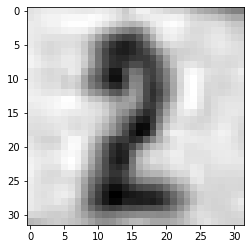

In [111]:
print("Actual Label: ", y_test[2])
print("Predicte Label", y_predict[2])
plt.imshow(X_test[2].reshape(32,32), cmap='gray')

Actual Label:  1
Predicte Label 1


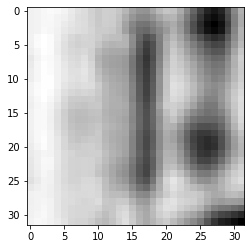

In [112]:
print("Actual Label: ", y_test[12])
print("Predicte Label", y_predict[12])
plt.imshow(X_test[12].reshape(32,32), cmap='gray')

Actual Label:  0
Predicte Label 0


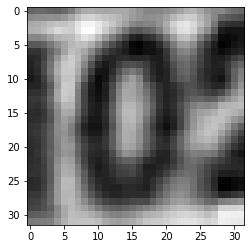

In [113]:
print("Actual Label: ", y_test[123])
print("Predicte Label", y_predict[123])
plt.imshow(X_test[123].reshape(32,32), cmap='gray')

Actual Label:  7
Predicte Label 7


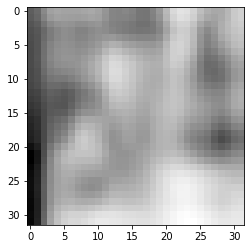

In [114]:
print("Actual Label: ", y_test[46])
print("Predicte Label", y_predict[46])
plt.imshow(X_test[46].reshape(32,32), cmap='gray')

Confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test , y_predict)
cm

array([[1324,   82,   19,   39,   44,   17,  144,   62,   43,   40],
       [  23, 1402,   33,   39,  108,   10,   46,  103,   40,   24],
       [  25,   51, 1328,   46,   48,   28,   33,  174,   33,   37],
       [  20,  107,   64, 1107,   47,  168,   23,   85,   57,   41],
       [  30,   77,   28,   17, 1480,   25,   57,   34,   33,   31],
       [  24,   46,   20,  136,   69, 1165,  101,   34,  105,   68],
       [ 112,   38,   16,   31,   82,   73, 1263,   26,  168,   23],
       [  14,   88,   78,   28,   24,   14,   30, 1498,   18,   16],
       [  49,   70,   31,   54,   82,   72,  161,   32, 1157,  104],
       [  62,   75,   47,   35,   73,   68,   43,   57,   77, 1267]])

Heat Map

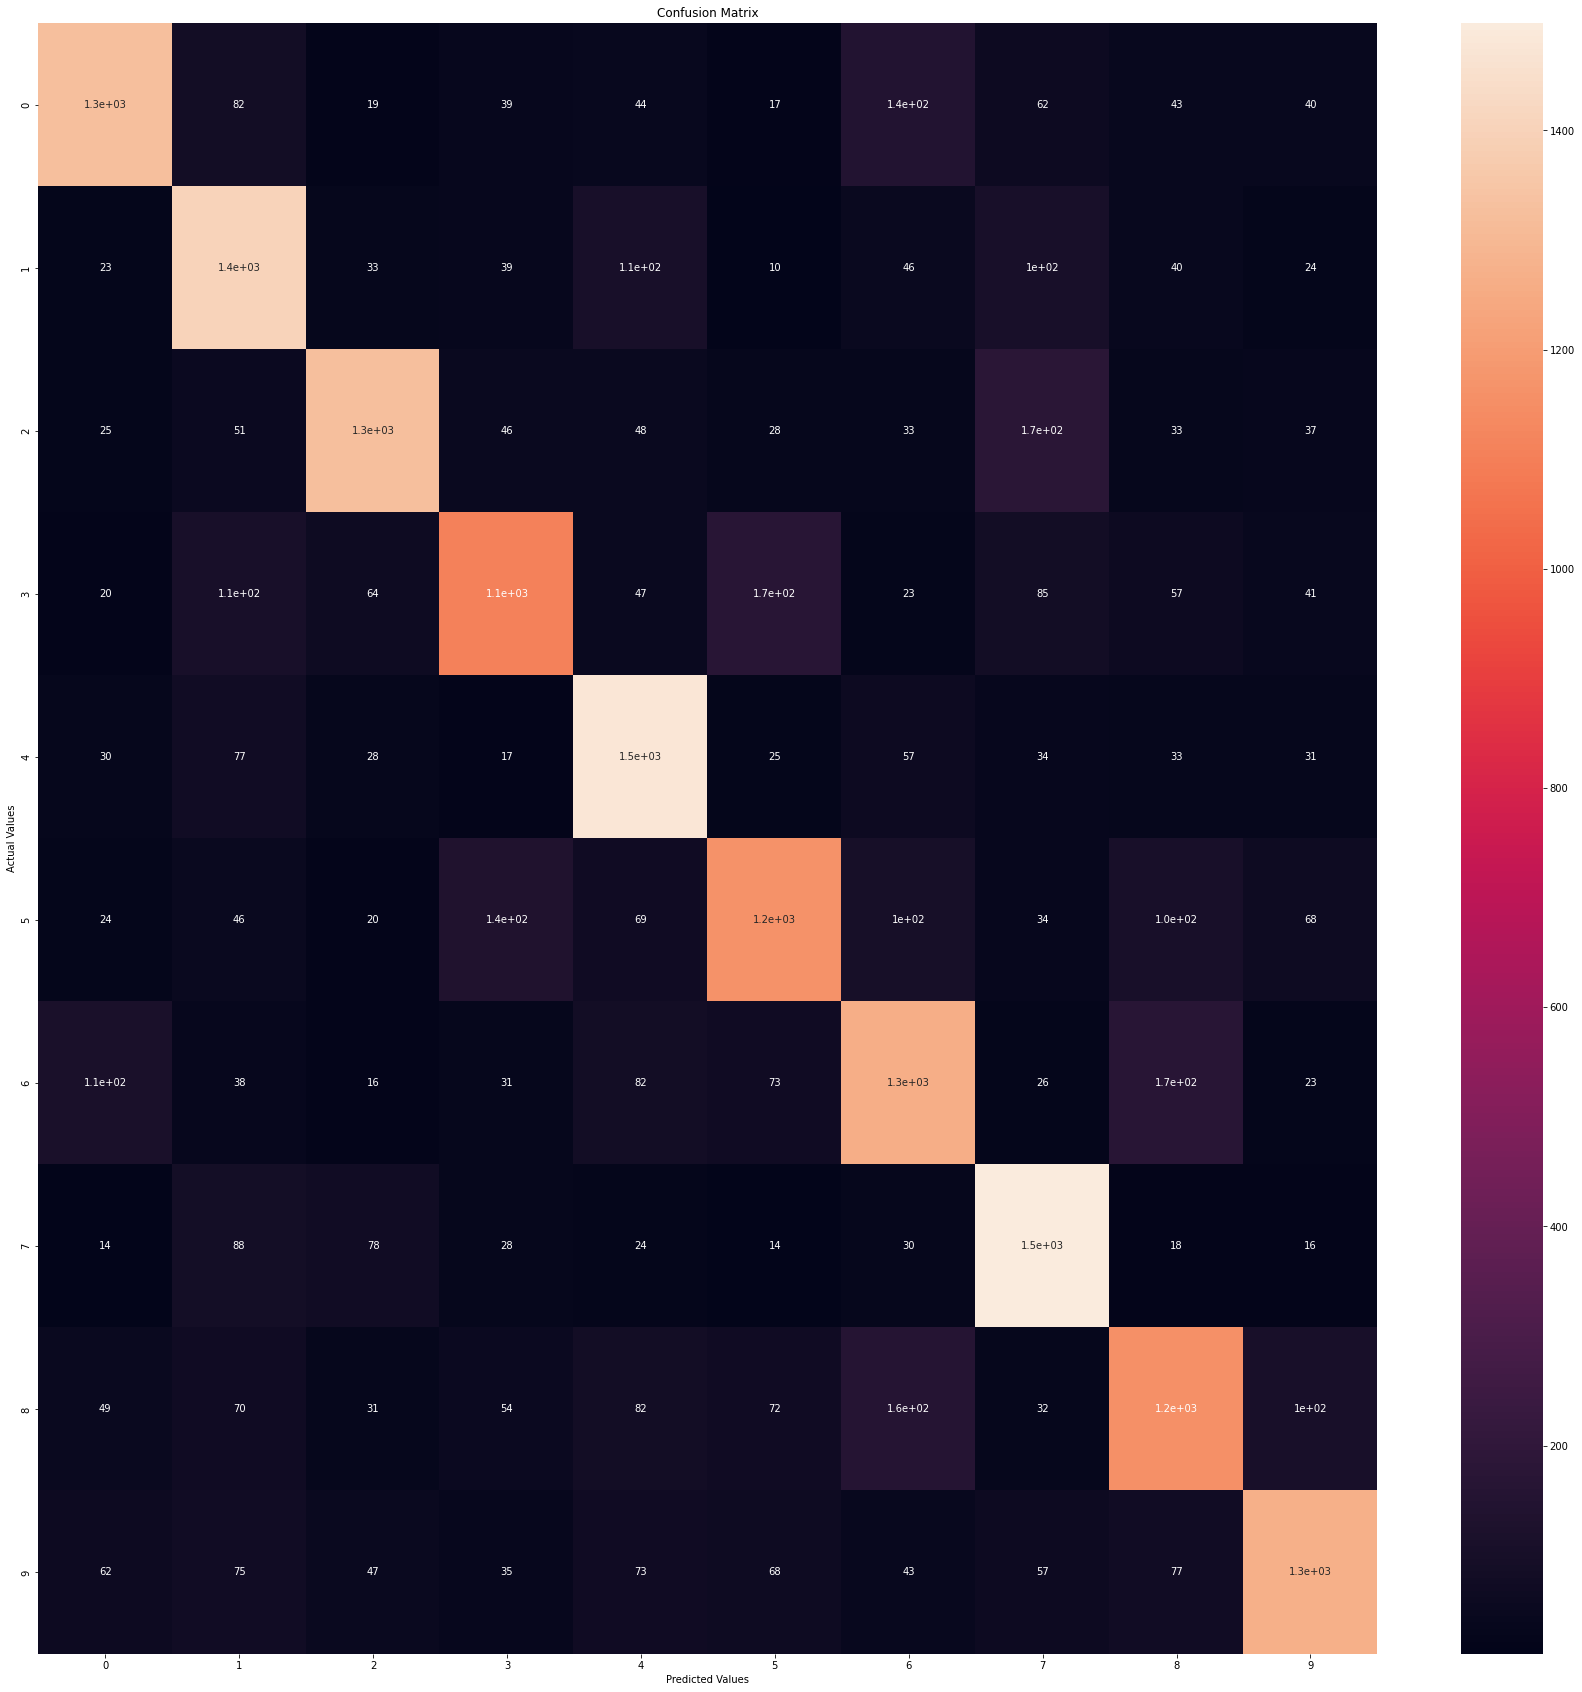

In [98]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


The model is accurately predicting the label for the image, this means that the neural network image classifier model is extremely well. 

* The train set accuracy is 0.76 or 76% and the test set accuracy is 0.72 or 72%

* The validation accuracy is higher than training accuracy, this means that the model isnt overfitting the dataset

* The model is accurately predicting the images and there was no error atleast in the predicted images. This Neural network model is able to predict accurately with 76% accuracy as this is only a number dataset. Which would have a predefined image value in the matrix. 